In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, glob
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from matplotlib.image import imread

In [ ]:

path = "/content/drive/MyDrive/Normal _ Stroke Patient Details"

In [ ]:
def segragating_types(path):
  mapping_dataset = {}
  for dir in os.listdir(path):
    if 'Normal' in dir:
      if 'Normal' not in mapping_dataset.keys():
        mapping_dataset["Normal"] = []
      mapping_dataset["Normal"].append(dir)

    if 'Haemorrhagic' in dir:
      if 'Haemorrhagic' not in mapping_dataset.keys():
        mapping_dataset["Haemorrhagic"] = []
      mapping_dataset["Haemorrhagic"].append(dir)

    if 'Ischmic'  in dir or 'Ischemic' in dir:
      if 'Ischemic' not in mapping_dataset.keys():
        mapping_dataset["Ischemic"] = []
      mapping_dataset["Ischemic"].append(dir)

  return mapping_dataset

mapping_dataset = segragating_types(path)

In [ ]:
mapping_dataset

{'Normal': ['Chitra_Normal',
  'Karnamoorthi_Normal',
  'Poornima_Normal',
  'Pavithra_Normal',
  'Bushan Yadav_Normal',
  'Salini_Normal'],
 'Ischemic': ['Ganga Pushbam_Stroke_Ischemic',
  'Amina_Stroke_Ischemic',
  'Anbazhgan_Stroke_Ischemic',
  'Ramachandran_Stroke_Ischmic',
  'Ellappan_Stroke_Ischemic',
  'New_Ischemic_Stroke'],
 'Haemorrhagic': ['Shamshath_Stroke_Haemorrhagic',
  'Manjula_Stroke_Haemorrhagic',
  'Venda_Stroke_Haemorrhagic',
  'Prabhakar Rao_Stroke_Haemorrhagic',
  'Kuppusamy_Stroke_Haemorrhagic']}

In [ ]:
import shutil
import os

def move_files_to_root_folder(old, new, mapping_dataset):
    for key, subdirs in mapping_dataset.items():
        os.makedirs(f"{new}/{key}", exist_ok=True)  # Ensure the folder exists
        for subdir in subdirs:
            subdir_path = f"{old}/{subdir}"
            if os.path.exists(subdir_path):
                for file in glob.glob(f"{subdir_path}/**/*.jpg", recursive=True):
                    shutil.copy2(file, f"{new}/{key}/")  # Copy each file individually
            else:
                print(f"Warning: {subdir_path} does not exist.")

move_files_to_root_folder(path, "/content/drive/MyDrive/DatasetMRI_Folder", mapping_dataset)


{'Normal': 399, 'Ischemic': 30, 'Haemorrhagic': 186}


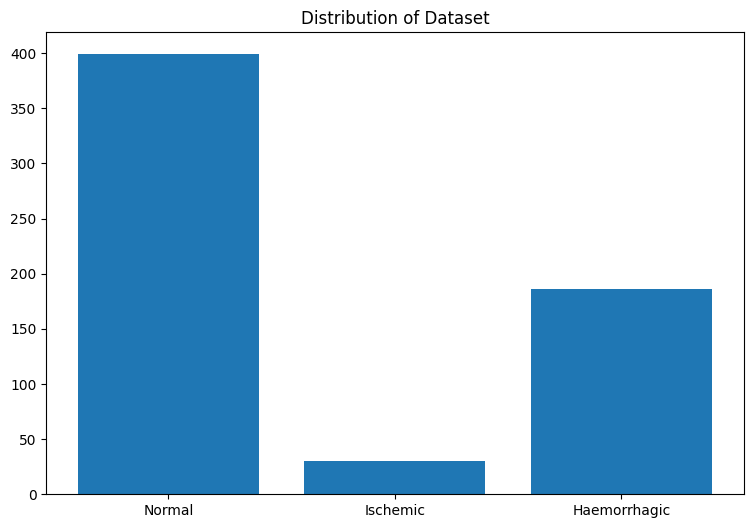

In [ ]:
class_names = mapping_dataset.keys()
nimgs = {}
root_path = "/content/drive/MyDrive/DatasetMRI_Folder"
for i in class_names:
  nimages = len(glob.glob(f'{root_path}/{i}/**/*.jpg', recursive=True))

  nimgs[i] = nimages

print(nimgs)
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of Dataset')
plt.show()

In [ ]:
import numpy as np
import cv2

def enhance_contrast(image_matrix, bins=256):
    image_flattened = image_matrix.flatten()
    image_hist = np.zeros(bins)

    # frequency count of each pixel
    for pix in image_matrix:
        image_hist[pix] += 1

    # cummulative sum
    cum_sum = np.cumsum(image_hist)
    norm = (cum_sum - cum_sum.min()) * 255
    # normalization of the pixel values
    n_ = cum_sum.max() - cum_sum.min()
    uniform_norm = norm / n_
    uniform_norm = uniform_norm.astype('int')

    # flat histogram
    image_eq = uniform_norm[image_flattened]
    # reshaping the flattened matrix to its original shape
    image_eq = np.reshape(a=image_eq, newshape=image_matrix.shape)

    return image_eq

In [ ]:
import cv2

def apply_enhancement(img):
  mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
  dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
  a_img =enhance_contrast(dst)
  return a_img


def visualize(image_path, class_name, enhancement=False):
  plt.figure(1,figsize=[20, 3])

  # plt.axis('off')
  n = 0
  for i in range(8):
    n += 1
    plt.suptitle(class_name, fontsize=34)
    img = cv2.imread(image_path[i])
    if enhancement:
      img = apply_enhancement(img)
    plt.subplot(1, 8, n)
    plt.imshow(img)

    plt.title(os.path.dirname(image_path[i]).split("/")[-1])
    plt.axis('off')
  return plt

def plot_images(class_names, enhancement=False):
  image_path = []
  for c in range(len(class_names)):
    image_path = glob.glob(f'{root_path}/{class_names[c]}/**/*.jpg', recursive=True)
    # fig = plt.figure()
    # fig.suptitle(class_names[c])
    visualize(image_path, class_names[c], enhancement).show()



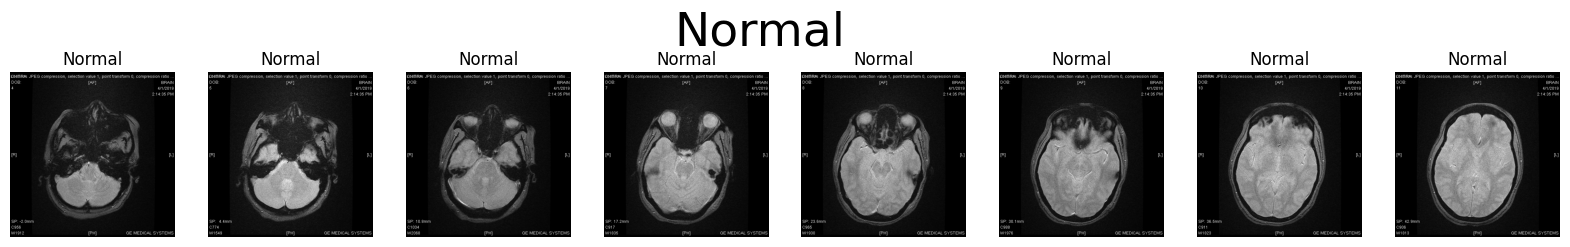

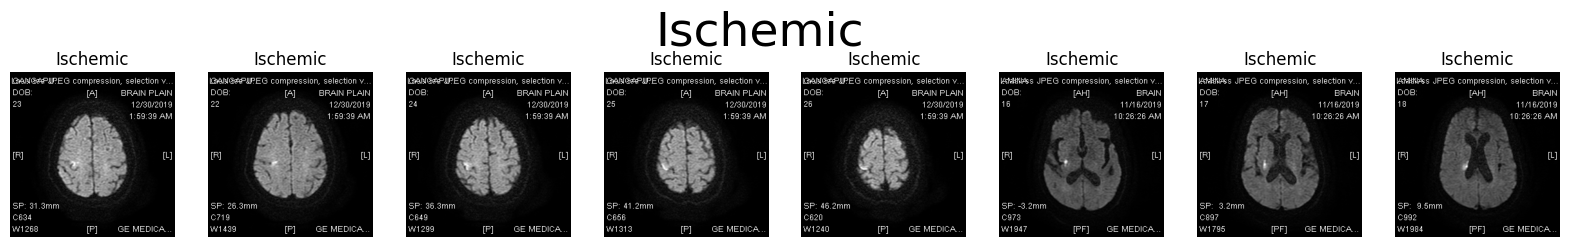

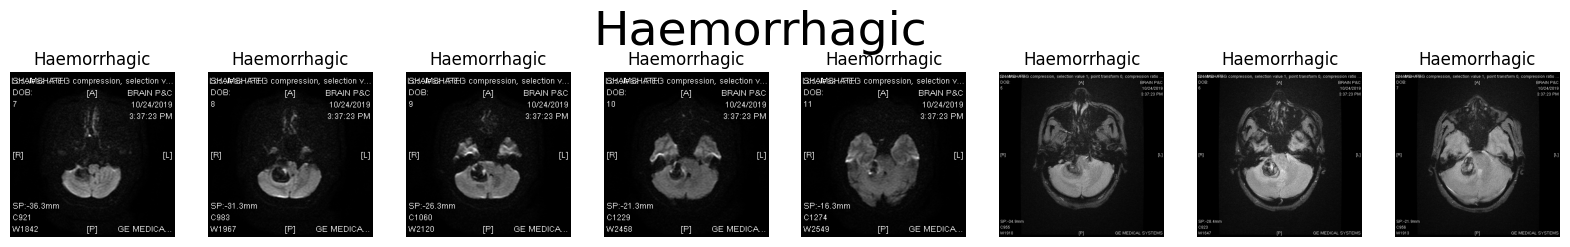

In [ ]:
plot_images(list(mapping_dataset.keys()))

In [ ]:
images = glob.glob(f"/content/drive/MyDrive/DatasetMRI_Folder/**/*.jpg", recursive=True)
def read_resize(img):
  img = cv2.imread(img)
  return cv2.resize(img, (256, 256))
Data = [np.array(read_resize(img)) for img in images]
Data = np.asarray(Data)

In [ ]:
len(images)

target =  []

for img in images:
  if 'Haemorrhagic' in img:
    target.append(0)
  elif 'Ischemic' in img:
    target.append(1)
  elif 'Normal' in img:
    target.append(2)

In [ ]:
Data.shape

(615, 256, 256, 3)

In [ ]:
num_images = Data.shape[0]
Data = Data.reshape(num_images, 256*256*3)
print(Data.shape)


(615, 196608)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(Data)

converted_data.shape

(615, 2)

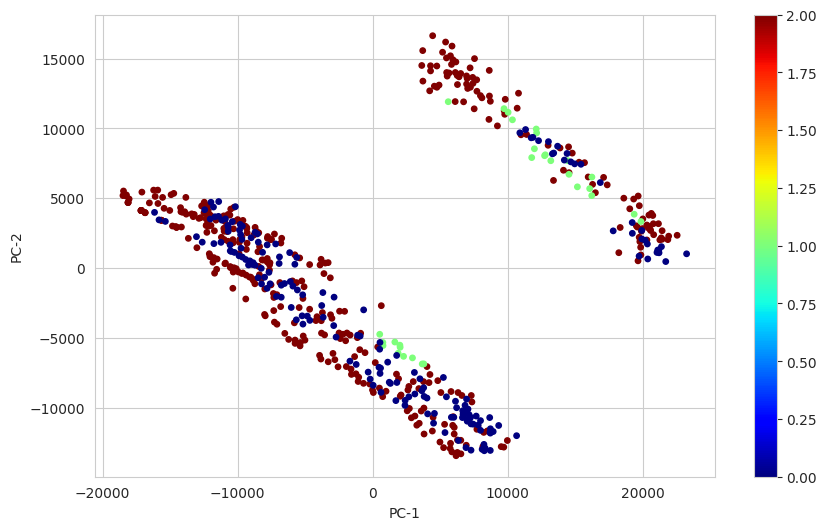

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")  # Use Seaborn's whitegrid style

plt.figure(figsize=(10, 6))

# Use the correct colormap method
c_map = plt.cm.jet  # Instead of get_cmap('jet', 10)

plt.scatter(converted_data[:, 0], converted_data[:, 1], s=15, cmap=c_map, c=np.array(target))
plt.colorbar()
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(3) # we need 3 principal components.
converted_data = pca.fit_transform(Data)

converted_data.shape

(615, 3)

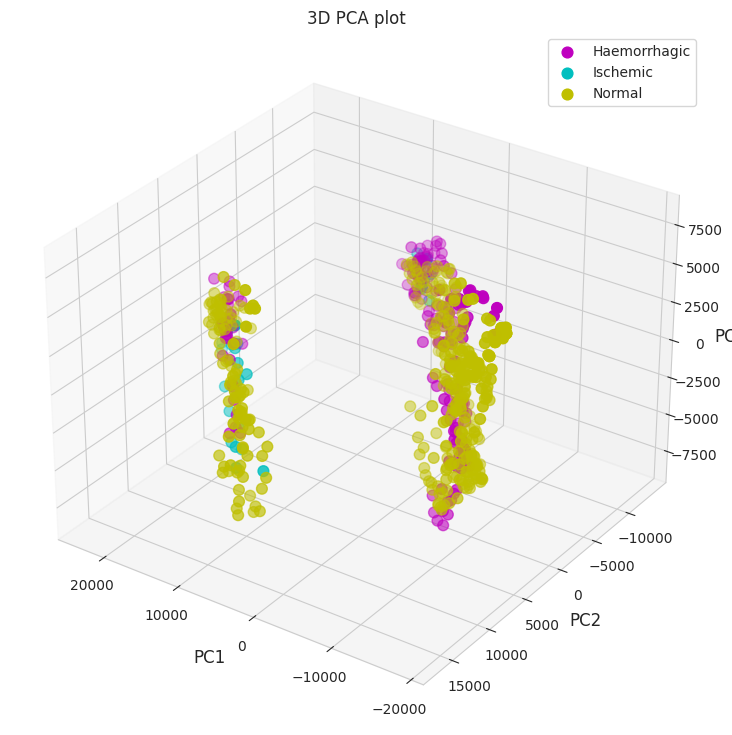

In [ ]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111,
                     projection='3d')

c_dict = {0: "m", 1: "c", 2:"y"}
label = {0: "Haemorrhagic", 1: "Ischemic", 2:"Normal"}
for l in np.unique(target):
 ix=np.where(target==l)
 ax.scatter(converted_data[:, 0][ix],
            converted_data[:, 1][ix],
            converted_data[:, 2][ix],
            c=c_dict[l],
            s=60,
           label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

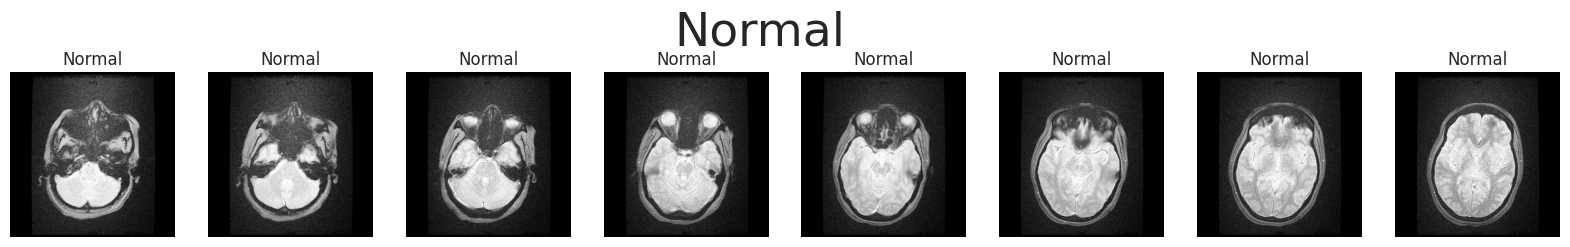

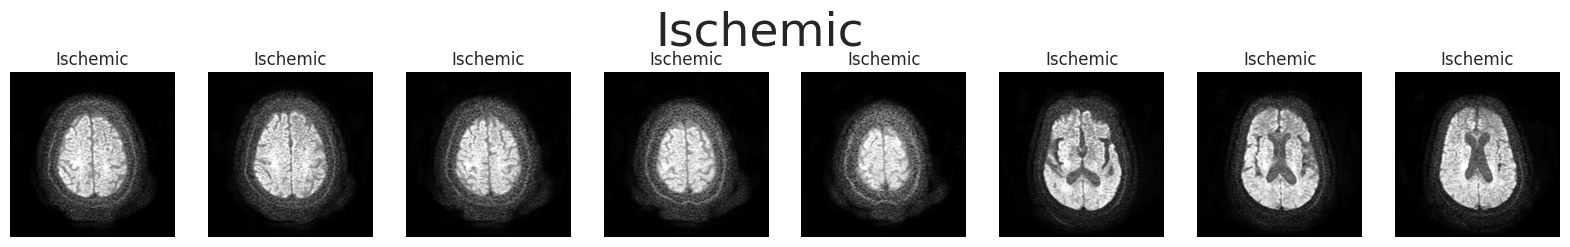

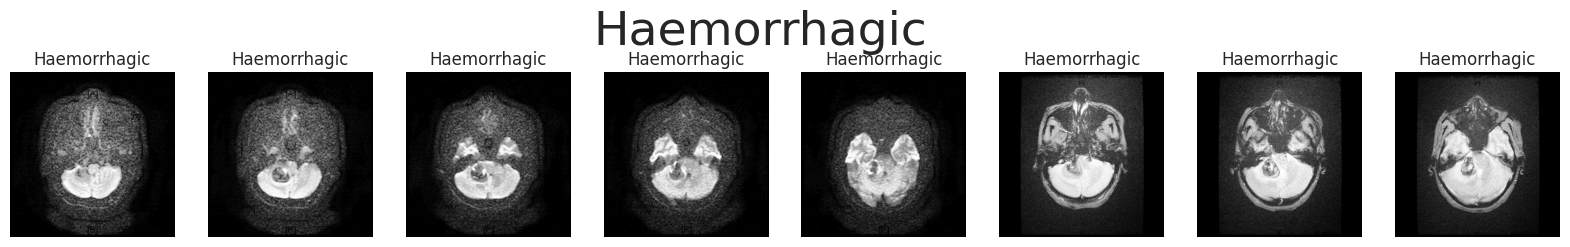

In [ ]:

plot_images(list(mapping_dataset.keys()), True)

In [ ]:

def move_images_to_train_folder(path, new_path, class_names):
  for class_name in class_names:
    try:
      os.makedirs(f"{new_path}/{class_name}")
    except Exception as e:
      print(e)
    i = 0
    for img_path in glob.glob(f"{path}/{class_name}/**/*.jpg", recursive=True):
      i+=1
      img_base_name = os.path.basename(img_path)
      img = cv2.imread(img_path)
      img = apply_enhancement(img)
      cv2.imwrite(f"{new_path}/{class_name}/{img_base_name}_{class_name}_{i}.png", img)

move_images_to_train_folder(root_path,"/content/drive/MyDrive/Stroke_classification_IH", list(mapping_dataset.keys()) )



In [ ]:
len(os.listdir("/content/drive/MyDrive/Stroke_classification_IH/Haemorrhagic"))

186

In [ ]:
len(os.listdir("/content/drive/MyDrive/Stroke_classification_IH/Ischemic"))

30

In [ ]:
len(os.listdir("/content/drive/MyDrive/Stroke_classification_IH/Normal"))

399

In [ ]:
!pip install -U fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = 'gdrive/My Drive/Colab Notebooks/'
base_dir = root_dir + 'ball_class'
path=Path(base_dir)

Mounted at /content/gdrive


In [ ]:
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [ ]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
  splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=Resize((200,200)),
   batch_tfms=aug_transforms()
  )


In [ ]:

Path = '/content/gdrive/MyDrive/Stroke_classification_IH'

dls = fields.dataloaders(Path)

In [ ]:

dls.vocab

['Haemorrhagic', 'Ischemic', 'Normal']

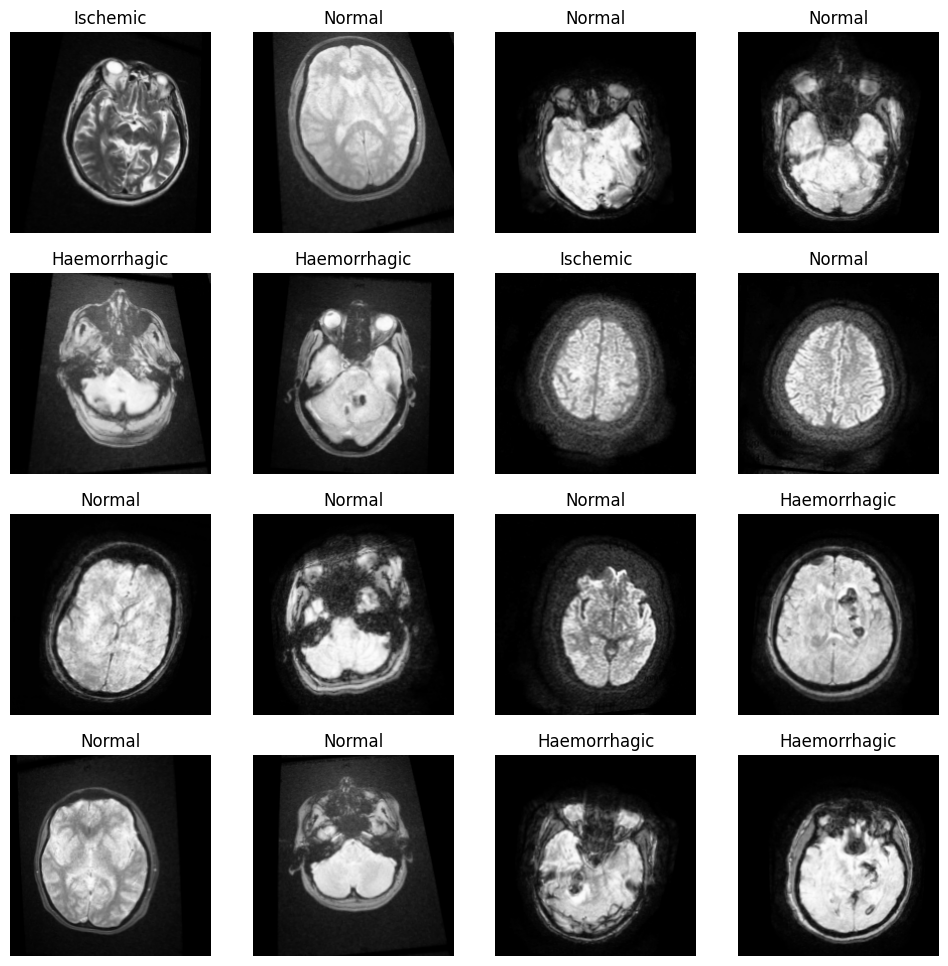

In [ ]:
dls.train.show_batch(max_n=16, nrows=4)

#Resnet

In [ ]:
learn_resent = cnn_learner(dls, resnet101, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:00<00:00, 184MB/s]


In [ ]:
learn_resent.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.649957,0.543167,0.235772,00:08
1,0.567118,0.474012,0.186992,00:10
2,0.580642,0.439456,0.170732,00:09
3,0.546279,0.388845,0.146341,00:08
4,0.518849,0.381334,0.170732,00:09


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

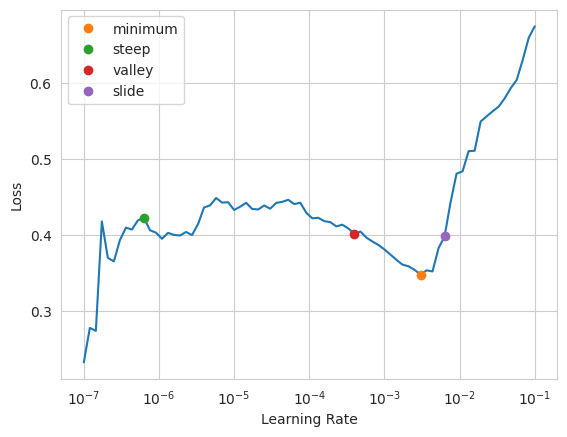

In [ ]:
learn_resent.unfreeze()
lrs = learn_resent.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
lrs

SuggestedLRs(minimum=0.0003019951749593019, steep=6.309573450380412e-07, valley=0.0003981071640737355, slide=0.0063095735386013985)

In [ ]:
learn_resent.fit_one_cycle(10,slice(lrs.minimum,lrs.slide))

epoch,train_loss,valid_loss,error_rate,time
0,0.491904,1.683146,0.382114,00:12
1,0.509592,2.264495,0.406504,00:10
2,0.580884,4.819294,0.162602,00:11
3,0.524829,0.639998,0.162602,00:11
4,0.455598,0.246824,0.105691,00:10
5,0.374087,0.130028,0.048780,00:10
6,0.313275,0.200586,0.056911,00:10
7,0.266274,0.164201,0.048780,00:11
8,0.226868,0.124339,0.040650,00:10
9,0.196186,0.116472,0.040650,00:10


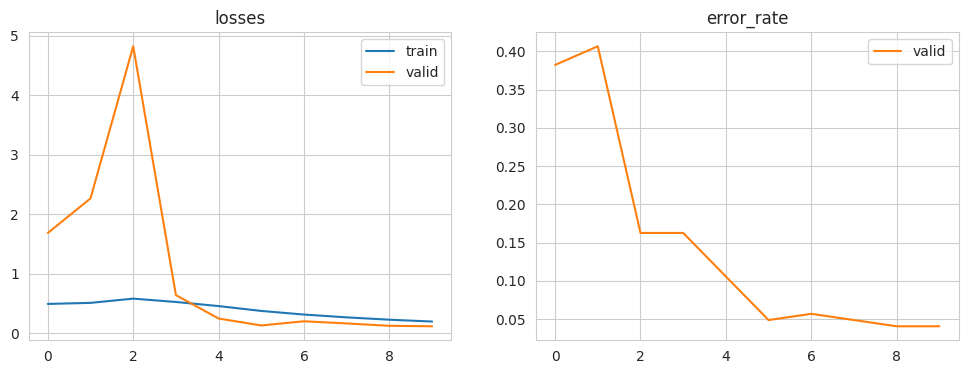

In [ ]:
learn_resent.recorder.plot_metrics()

#DenseNet

In [ ]:
learn_densenet = cnn_learner(dls, densenet169, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 89.4MB/s]


In [ ]:
learn_densenet.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.530737,0.929935,0.422764,00:08
1,1.204114,0.607672,0.219512,00:10
2,0.927827,0.450273,0.178862,00:08
3,0.749117,0.376238,0.162602,00:07
4,0.614258,0.487868,0.195122,00:09


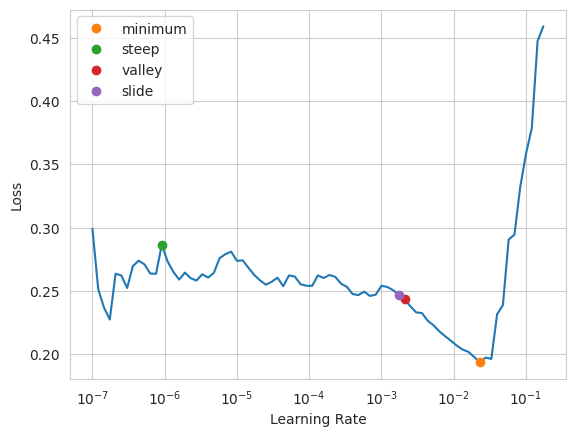

In [ ]:
lrs_densenet = learn_densenet.lr_find(suggest_funcs=(minimum, steep, valley, slide))

epoch,train_loss,valid_loss,error_rate,time
0,0.306296,1.442981,0.341463,00:09
1,0.361254,10.621729,0.536585,00:08
2,0.404702,4.379210,0.195122,00:10
3,0.374271,4.521634,0.162602,00:08
4,0.356262,0.725871,0.089431,00:09
5,0.308586,0.236416,0.065041,00:09
6,0.254610,0.114310,0.040650,00:08
7,0.214181,0.138185,0.056911,00:12
8,0.178604,0.121218,0.040650,00:09
9,0.152489,0.115116,0.032520,00:08


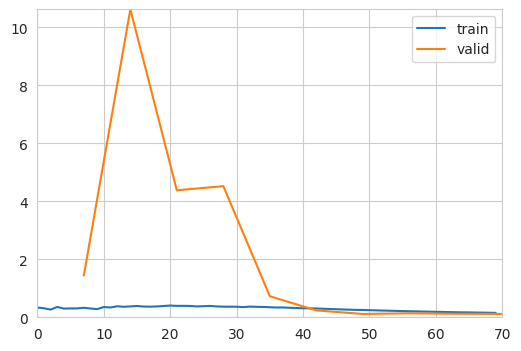

In [ ]:
learn_densenet.unfreeze()
learn_densenet.fit_one_cycle(10,slice(lrs.minimum,lrs.slide),cbs=[ShowGraphCallback()])

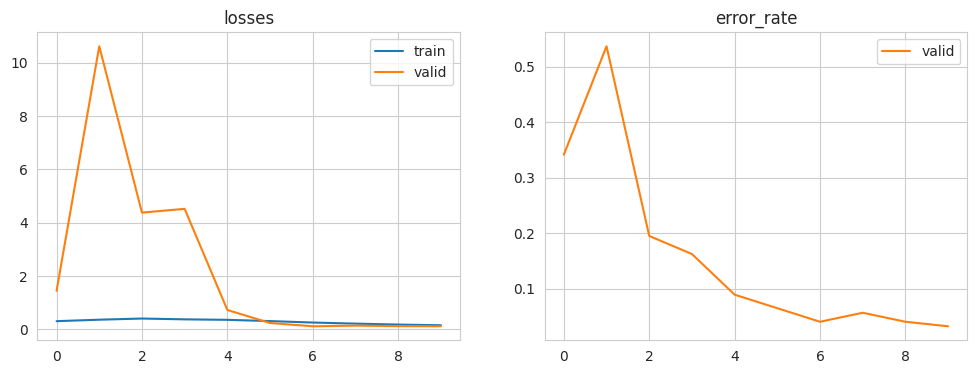

In [ ]:
learn_densenet.recorder.plot_metrics()

#GoogleNet

In [ ]:
learn_inception = cnn_learner(dls, googlenet, metrics=error_rate)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 56.9MB/s]


In [ ]:
learn_inception.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.823304,1.023971,0.479675,00:09
1,1.500353,0.879769,0.414634,00:06
2,1.259556,0.731420,0.284553,00:09
3,1.103435,0.593536,0.203252,00:06
4,0.989735,0.500511,0.203252,00:09


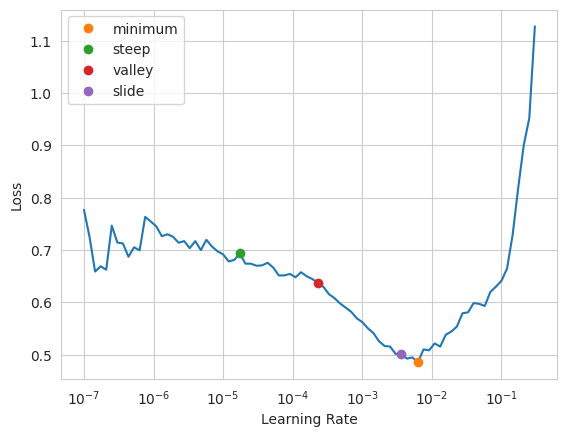

In [ ]:
learn_inception.unfreeze()
lrs = learn_inception.lr_find(suggest_funcs=(minimum, steep, valley, slide))

epoch,train_loss,valid_loss,error_rate,time
0,0.629428,0.552437,0.162602,00:07
1,0.570430,0.546453,0.105691,00:06
2,0.522467,0.637947,0.195122,00:07
3,0.434011,2.149777,0.398374,00:06
4,0.371734,0.402381,0.081301,00:09
5,0.337325,0.425665,0.089431,00:06
6,0.299322,0.431228,0.081301,00:08
7,0.260288,0.321607,0.073171,00:06
8,0.219369,0.280891,0.073171,00:10
9,0.194000,0.280795,0.073171,00:06


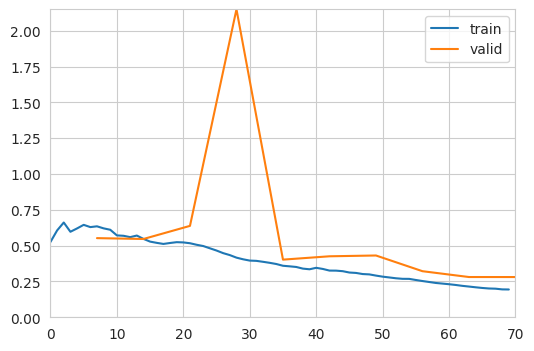

In [ ]:
learn_inception.fit_one_cycle(10,slice(lrs.minimum,lrs.slide),cbs=[ShowGraphCallback()])

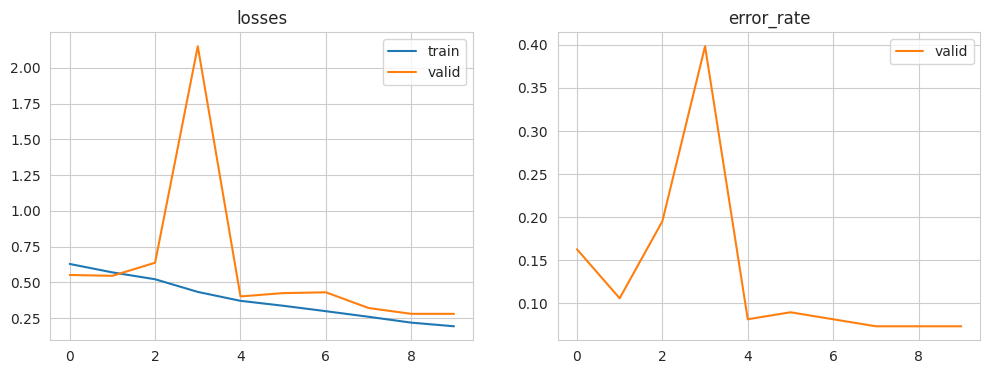

In [ ]:
learn_inception.recorder.plot_metrics()

#AlexNet


In [ ]:
learn_alexnet = cnn_learner(dls, alexnet,  metrics=error_rate)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 99.0MB/s]


In [ ]:
learn_alexnet.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.765483,0.746712,0.276423,00:07
1,1.500960,0.651498,0.252033,00:05
2,1.298604,0.470152,0.178862,00:08
3,1.173244,0.408038,0.154472,00:05
4,1.084491,0.398746,0.154472,00:07


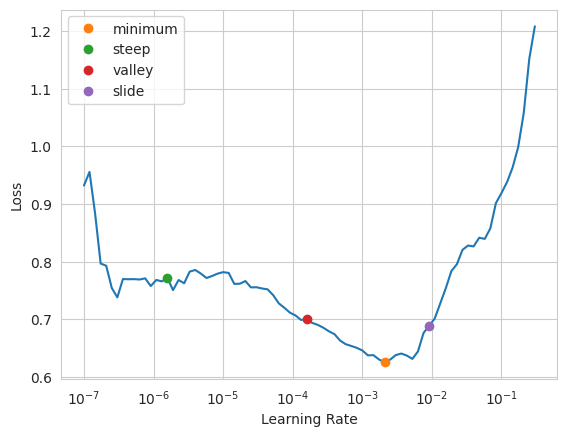

In [ ]:
learn_alexnet.unfreeze()
lr_alexnet = learn_alexnet.lr_find(suggest_funcs=(minimum, steep, valley, slide))

epoch,train_loss,valid_loss,error_rate,time
0,0.703873,0.345251,0.130081,00:08
1,0.581756,0.606029,0.130081,00:07
2,0.516758,11.876193,0.601626,00:09
3,0.485501,0.807668,0.146341,00:06
4,0.469326,1.294419,0.162602,00:08
5,0.448524,3.448249,0.487805,00:06
6,0.402947,1.429991,0.382114,00:08
7,0.364768,0.271143,0.097561,00:05
8,0.321997,0.102511,0.040650,00:07
9,0.283541,0.074161,0.024390,00:05


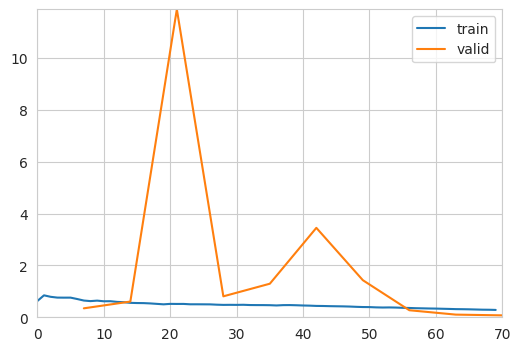

In [ ]:
learn_alexnet.fit_one_cycle(10,slice(lr_alexnet.minimum,lr_alexnet.slide),cbs=[ShowGraphCallback()])

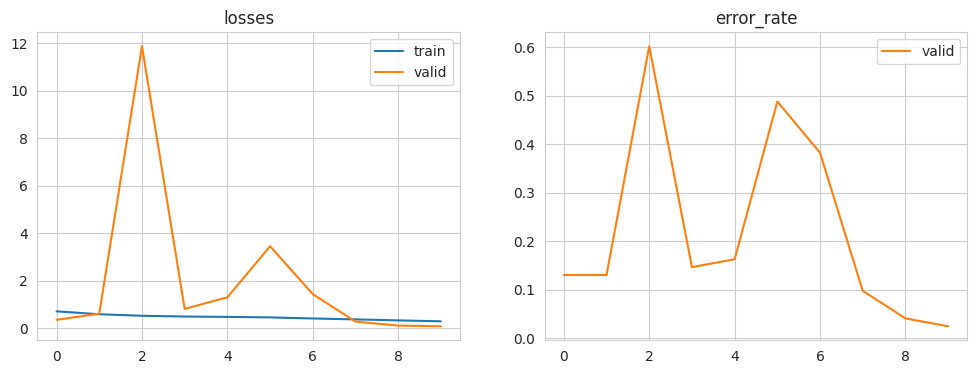

In [ ]:
learn_alexnet.recorder.plot_metrics()

#mobileNet


In [ ]:
learn_mobilenet = cnn_learner(dls,mobilenet_v3_small,metrics = error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn_mobilenet.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.794065,1.031660,0.455285,00:11
1,1.605209,1.014135,0.430894,00:06
2,1.348746,1.133574,0.455285,00:07
3,1.195999,0.966093,0.398374,00:06
4,1.096290,0.988179,0.382114,00:06


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

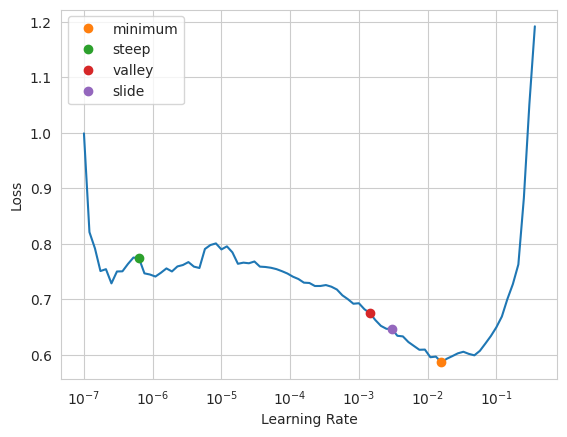

In [ ]:
learn_mobilenet.unfreeze()
lrs = learn_mobilenet.lr_find(suggest_funcs=(minimum,steep,valley,slide))

epoch,train_loss,valid_loss,error_rate,time
0,0.800194,0.788158,0.300813,00:09
1,0.723177,1.330351,0.317073,00:06
2,0.643429,2.128315,0.398374,00:08
3,0.561075,6.494826,0.487805,00:05
4,0.488190,3.123305,0.357724,00:09
5,0.420944,2.726953,0.349593,00:06
6,0.374012,3.239435,0.373984,00:09
7,0.321112,2.831282,0.365854,00:05
8,0.275213,2.507616,0.365854,00:09
9,0.234138,2.097964,0.357724,00:05


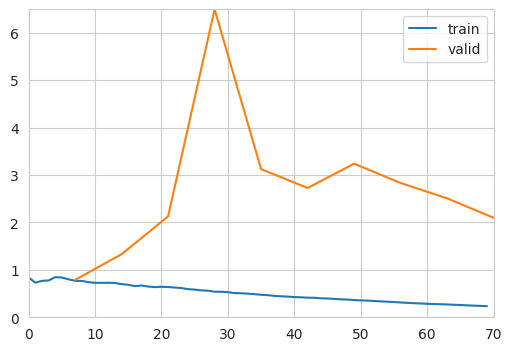

In [ ]:
learn_mobilenet.fit_one_cycle(10,slice(lrs.minimum,lrs.slide),cbs=[ShowGraphCallback()])

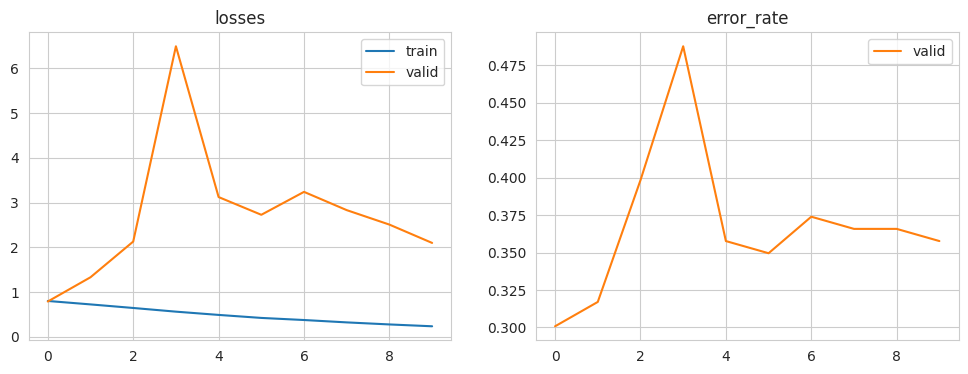

In [ ]:
learn_mobilenet.recorder.plot_metrics()

#VGG16

In [ ]:
learn_vgg= cnn_learner(dls, vgg16_bn, metrics=error_rate)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:03<00:00, 145MB/s]


In [ ]:
learn_vgg.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.901813,1.051935,0.528455,00:13
1,1.603106,0.821770,0.349593,00:08
2,1.349611,0.654743,0.308943,00:09
3,1.201010,0.540829,0.260163,00:10
4,1.075610,0.470022,0.170732,00:09


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

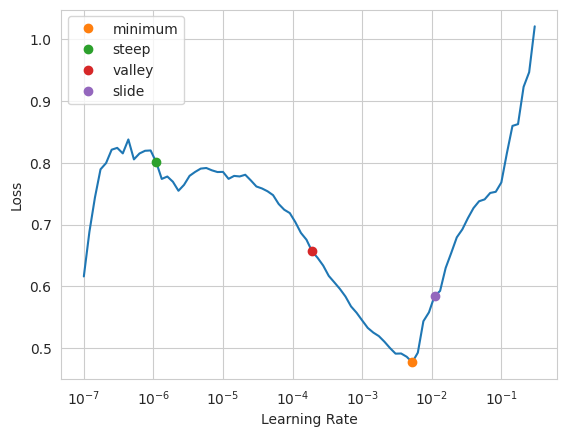

In [ ]:
learn_vgg.unfreeze()
lrs = learn_vgg.lr_find(suggest_funcs=(minimum, steep, valley, slide))

epoch,train_loss,valid_loss,error_rate,time
0,0.643663,4.877424,0.593496,00:11
1,0.545789,138.560791,0.642276,00:10
2,0.556271,230.251053,0.642276,00:09
3,0.488748,53.261196,0.642276,00:11
4,0.405056,1.054391,0.219512,00:10
5,0.328800,0.100451,0.024390,00:09
6,0.282174,0.379157,0.065041,00:11
7,0.231979,0.260846,0.056911,00:10
8,0.192256,0.204951,0.048781,00:09
9,0.161199,0.144366,0.048781,00:11


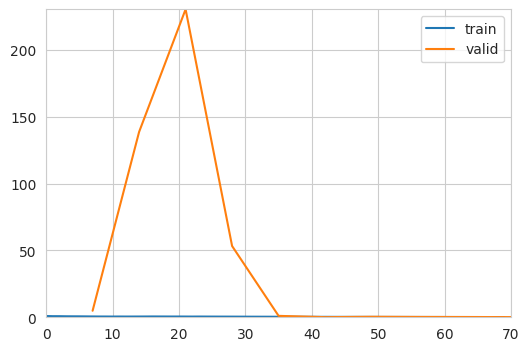

In [ ]:
learn_vgg.fit_one_cycle(10,slice(lrs.minimum,lrs.slide),cbs=[ShowGraphCallback()])

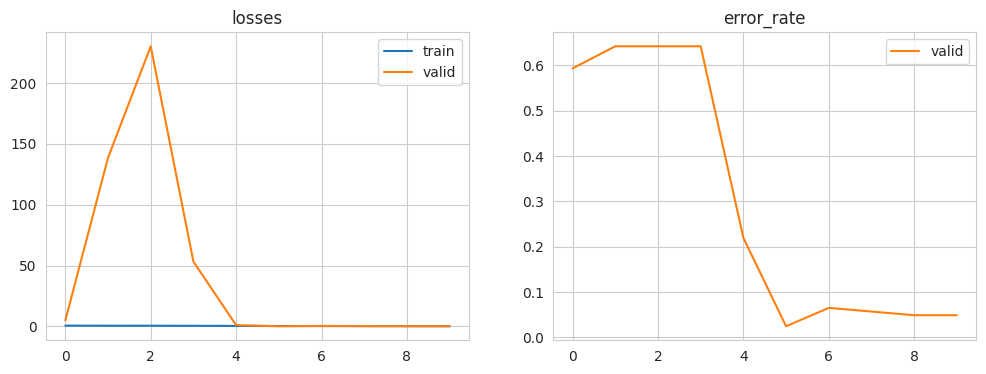

In [ ]:
learn_vgg.recorder.plot_metrics()

In [ ]:
learn_regnet = cnn_learner(dls, regnet_y_800mf, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RegNet_Y_800MF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_Y_800MF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/regnet_y_800mf-1b27b58c.pth" to /root/.cache/torch/hub/checkpoints

In [ ]:
learn_regnet.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.915488,0.925220,0.430894,00:09
1,1.589140,0.728012,0.235772,00:06
2,1.304644,0.584173,0.211382,00:11
3,1.129400,0.724694,0.252033,00:08
4,1.016174,0.866198,0.341463,00:08


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

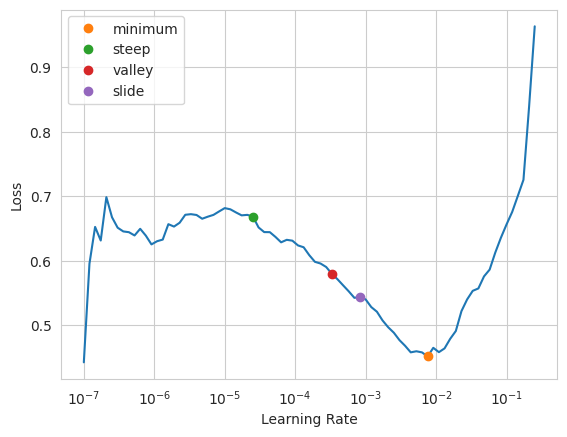

In [ ]:
learn_regnet.unfreeze()
lrs = learn_regnet.lr_find(suggest_funcs=(minimum, steep, valley, slide))

epoch,train_loss,valid_loss,error_rate,time
0,0.736916,0.815369,0.308943,00:06
1,0.567909,0.749736,0.227642,00:08
2,0.456812,0.422092,0.121951,00:06
3,0.366710,0.258333,0.073171,00:09
4,0.294460,0.170113,0.040650,00:06
5,0.253396,0.341169,0.056911,00:09
6,0.215057,0.155392,0.032520,00:06
7,0.189566,0.194856,0.040650,00:09
8,0.168102,0.114300,0.032520,00:06
9,0.143923,0.105783,0.024390,00:09


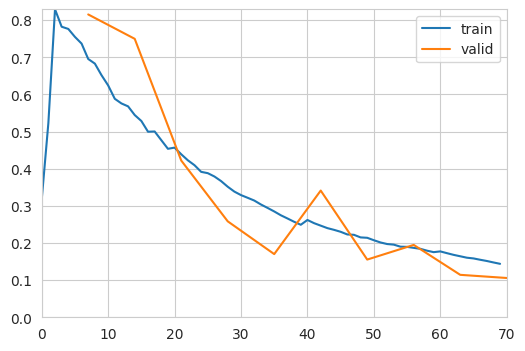

In [ ]:
learn_regnet.fit_one_cycle(10,slice(lrs.minimum,lrs.slide),cbs=[ShowGraphCallback()])

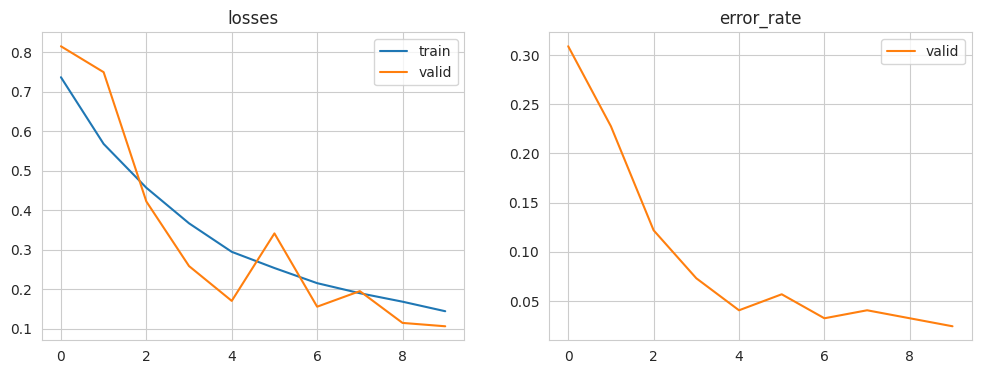

In [ ]:
learn_regnet.recorder.plot_metrics()

Classification Report

In [ ]:
interp_res = ClassificationInterpretation.from_learner(learn_resent)
interp_den = ClassificationInterpretation.from_learner(learn_densenet)
interp_inception = ClassificationInterpretation.from_learner(learn_inception)
interp_alexnet = ClassificationInterpretation.from_learner(learn_alexnet)
interp_mobilenet = ClassificationInterpretation.from_learner(learn_mobilenet)
interp_vgg = ClassificationInterpretation.from_learner(learn_vgg)
interp_regnet = ClassificationInterpretation.from_learner(learn_regnet)

In [ ]:
print("ResNet Classification report\n")
interp_res.print_classification_report()
print("-------------------------------------------------------")

print("DenseNet Classification report\n")
interp_den.print_classification_report()
print("-------------------------------------------------------")

print("GoogleNet Classification report\n")
interp_inception.print_classification_report()
print("-------------------------------------------------------")

print("AlexNet Classification report\n")
interp_alexnet.print_classification_report()
print("-------------------------------------------------------")
print("MobileNet Classification report\n")
interp_mobilenet.print_classification_report()
print("-------------------------------------------------------")
print("VGG Classification report\n")
interp_vgg.print_classification_report()
print("-------------------------------------------------------")
print("RegNet Classification report\n")
interp_regnet.print_classification_report()
print("-------------------------------------------------------")

ResNet Classification report



              precision    recall  f1-score   support

Haemorrhagic       0.98      0.91      0.94        44
    Ischemic       1.00      1.00      1.00         5
      Normal       0.95      0.99      0.97        74

    accuracy                           0.96       123
   macro avg       0.97      0.97      0.97       123
weighted avg       0.96      0.96      0.96       123

-------------------------------------------------------
DenseNet Classification report



              precision    recall  f1-score   support

Haemorrhagic       0.95      0.95      0.95        44
    Ischemic       1.00      1.00      1.00         5
      Normal       0.97      0.97      0.97        74

    accuracy                           0.97       123
   macro avg       0.98      0.98      0.98       123
weighted avg       0.97      0.97      0.97       123

-------------------------------------------------------
GoogleNet Classification report



              precision    recall  f1-score   support

Haemorrhagic       0.97      0.84      0.90        44
    Ischemic       0.80      0.80      0.80         5
      Normal       0.91      0.99      0.95        74

    accuracy                           0.93       123
   macro avg       0.90      0.88      0.88       123
weighted avg       0.93      0.93      0.93       123

-------------------------------------------------------
AlexNet Classification report



              precision    recall  f1-score   support

Haemorrhagic       0.97      0.75      0.85        44
    Ischemic       1.00      0.80      0.89         5
      Normal       0.86      0.99      0.92        74

    accuracy                           0.89       123
   macro avg       0.94      0.85      0.88       123
weighted avg       0.90      0.89      0.89       123

-------------------------------------------------------
MobileNet Classification report



              precision    recall  f1-score   support

Haemorrhagic       0.28      0.30      0.29        44
    Ischemic       0.06      0.80      0.11         5
      Normal       0.50      0.04      0.07        74

    accuracy                           0.16       123
   macro avg       0.28      0.38      0.16       123
weighted avg       0.40      0.16      0.15       123

-------------------------------------------------------
VGG Classification report



              precision    recall  f1-score   support

Haemorrhagic       1.00      0.86      0.93        44
    Ischemic       0.83      1.00      0.91         5
      Normal       0.94      1.00      0.97        74

    accuracy                           0.95       123
   macro avg       0.92      0.95      0.93       123
weighted avg       0.96      0.95      0.95       123

-------------------------------------------------------
RegNet Classification report



              precision    recall  f1-score   support

Haemorrhagic       1.00      0.93      0.96        44
    Ischemic       0.83      1.00      0.91         5
      Normal       0.97      1.00      0.99        74

    accuracy                           0.98       123
   macro avg       0.94      0.98      0.95       123
weighted avg       0.98      0.98      0.98       123

-------------------------------------------------------


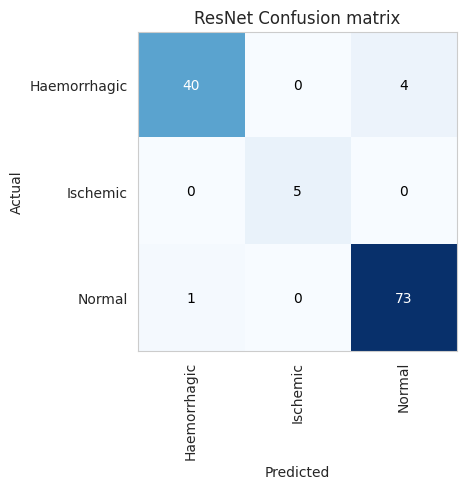

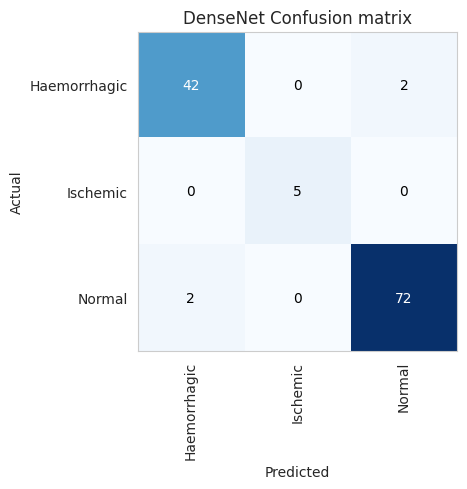

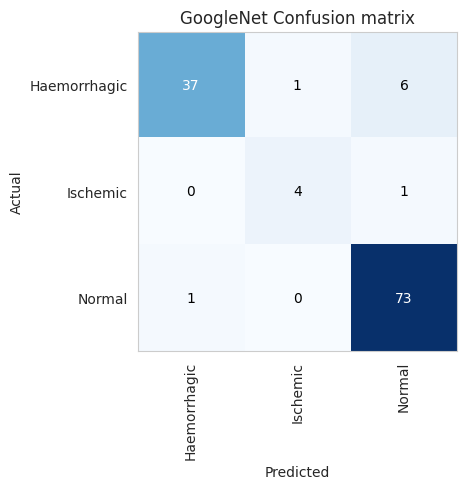

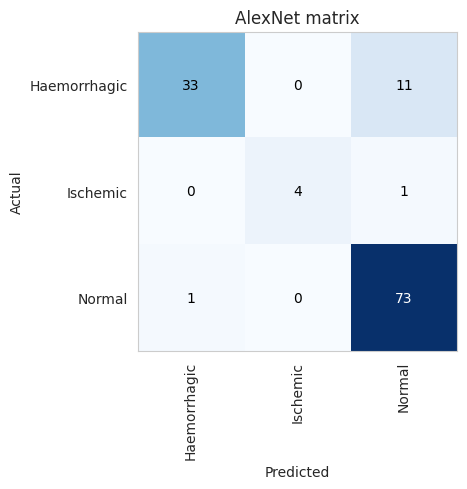

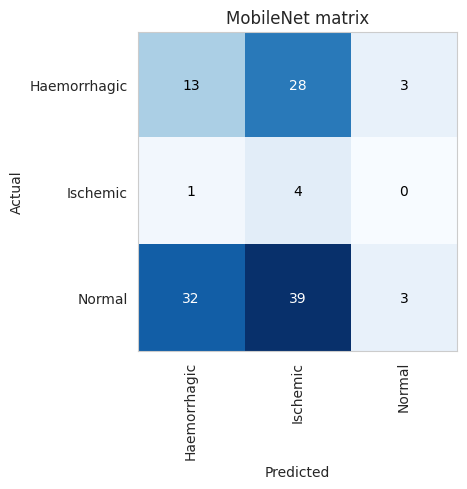

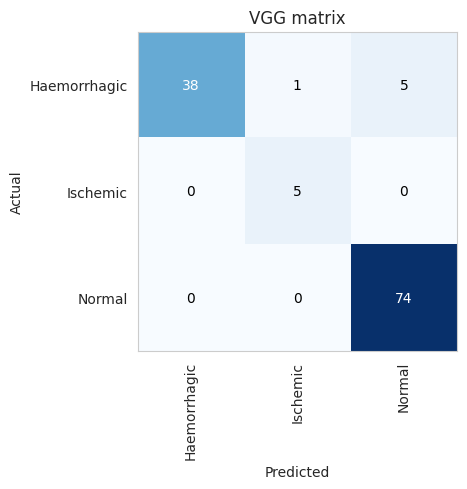

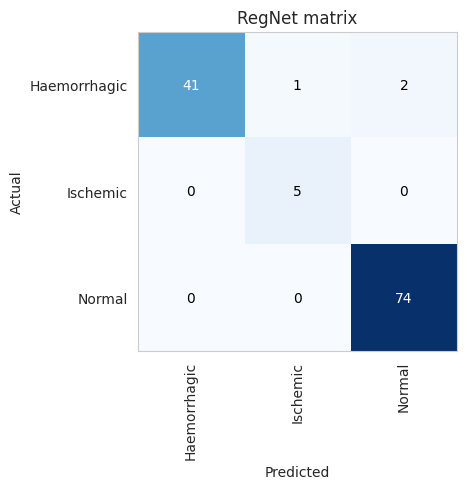

In [ ]:
interp_res.plot_confusion_matrix(title='ResNet Confusion matrix')
interp_den.plot_confusion_matrix(title='DenseNet Confusion matrix')
interp_inception.plot_confusion_matrix(title='GoogleNet Confusion matrix')
interp_alexnet.plot_confusion_matrix(title='AlexNet matrix')
interp_mobilenet.plot_confusion_matrix(title='MobileNet matrix')
interp_vgg.plot_confusion_matrix(title='VGG matrix')
interp_regnet.plot_confusion_matrix(title='RegNet matrix')

In [ ]:
def print_acc(learn):
  preds,y, loss = learn.get_preds(with_loss=True)
  acc = accuracy(preds, y)
  return acc

print('ResNet accuracy is {0} %.'.format(print_acc(learn_resent)))
print('DenseNet accuracy is {0} %.'.format(print_acc(learn_densenet)))
print('AlexNet accuracy is {0} %.'.format(print_acc(learn_alexnet)))
print('GoogleNet accuracy is {0} %.'.format(print_acc(learn_inception)))
print('MobileNet accuracy is {0} %.'.format(print_acc(learn_mobilenet)))
print('VGG accuracy is {0} %.'.format(print_acc(learn_vgg)))
print('RegNet accuracy is {0} %.'.format(print_acc(learn_regnet)))

ResNet accuracy is TensorBase(0.9593) %.


DenseNet accuracy is TensorBase(0.9675) %.


AlexNet accuracy is TensorBase(0.8943) %.


GoogleNet accuracy is TensorBase(0.9268) %.


MobileNet accuracy is TensorBase(0.1626) %.


VGG accuracy is TensorBase(0.9512) %.


RegNet accuracy is TensorBase(0.9756) %.


In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
preds,y, loss = learn_densenet.get_preds(with_loss=True)
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 1.0


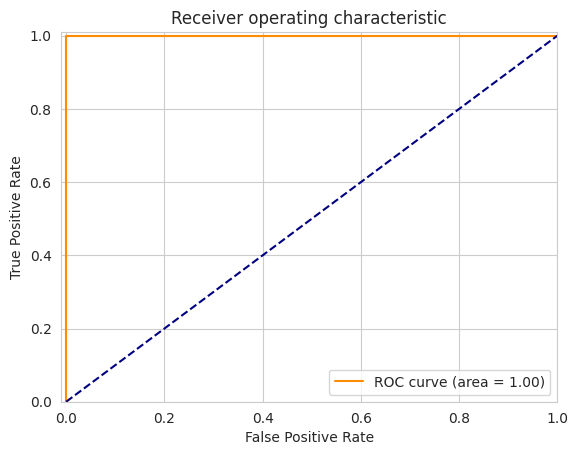

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
# Save models in PKL format
learn_resent.export('/content/gdrive/MyDrive/resnet101_model.pkl')
learn_densenet.export('/content/gdrive/MyDrive/densenet169_model.pkl')
learn_inception.export('/content/gdrive/MyDrive/googlenet_model.pkl')
learn_alexnet.export('/content/gdrive/MyDrive/alexnet_model.pkl')
learn_mobilenet.export('/content/gdrive/MyDrive/mobilenet_v3_model.pkl')
learn_vgg.export('/content/gdrive/MyDrive/vgg16_model.pkl')
learn_regnet.export('/content/gdrive/MyDrive/regnet_model.pkl')



In [ ]:
import torch

# Save in H5 format
torch.save(learn_resent.model.state_dict(), "/content/gdrive/MyDrive/resnet101_model.h5")
torch.save(learn_densenet.model.state_dict(), "/content/gdrive/MyDrive/densenet169_model.h5")
torch.save(learn_inception.model.state_dict(), "/content/gdrive/MyDrive/googlenet_model.h5")
torch.save(learn_alexnet.model.state_dict(), "/content/gdrive/MyDrive/alexnet_model.h5")
torch.save(learn_mobilenet.model.state_dict(), "/content/gdrive/MyDrive/mobilenet_v3_model.h5")
torch.save(learn_vgg.model.state_dict(), "/content/gdrive/MyDrive/vgg16_model.h5")
torch.save(learn_regnet.model.state_dict(), "/content/gdrive/MyDrive/regnet_model.h5")
